In [167]:
import pandas as pd
import numpy as np
import sklearn
from sklearnex import patch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [168]:
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### 분류 문제
- 3개 품종 중 2개 선택
    * Setosa, Virginica
- 전처리 및 모델 구성
    * Scaler 사용 : RobustScaler
    * target : species
    * features : 나머지 수치값들
    * 모델 : RogisticRegression
- 성능 평가
    * confusion matrix
    * classificaiton result (f1, recall, precision 등)


In [169]:
dftwo = df[df['variety'].isin(['Setosa', 'Virginica'])]
dftwo.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [170]:
dftwo.shape

(100, 5)

In [171]:
X = dftwo[dftwo.columns[:-1]]
y = dftwo[dftwo.columns[-1]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=304,
    stratify=y
)

X_train.shape, y_train.shape

((80, 4), (80,))

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = Pipeline(
    [
        ('preRobust', RobustScaler()),
        ('Logistic', LogisticRegression(max_iter=10**10))
    ]
)

model.fit(X_train, y_train)


Pipeline(steps=[('preRobust', RobustScaler()),
                ('Logistic', LogisticRegression(max_iter=10000000000))])

In [173]:
print(f"f1 score : {model.score(X_test, y_test)}")

f1 score : 1.0


In [174]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [175]:
print(confusion_matrix(y_test, model.predict(X_test)))

[[10  0]
 [ 0 10]]


In [176]:
model.predict([[3.1, 5.5,2.4, 0.5]])

c:\Users\Administrator\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype=object)

In [177]:
model.predict([[7.2,	3.4,	4.4,	3.3]])

c:\Users\Administrator\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array(['Virginica'], dtype=object)

### 회귀 모델 분석

- 3개 품종 중 1개 선택
    * Setosa
- 전처리 및 모델 구성
    * Scaler 사용 : RobustScaler (iqr 기반 전처리)
    * target : 꽃잎의 길이값 pedal length
    * features : 나머지 수치값
    * 모델 : RogisticRegression
- 성능 평가
    * r^2 분석 score
    * RMSE, MAE 분석 진행 

In [178]:
dfOnly1 = df[df['variety'] == 'Virginica']

X = dfOnly1[
    dftwo.columns[0:1].tolist() +
    dftwo.columns[-2:-1].tolist()
    ]
y = dfOnly1[dftwo.columns[-3]]

X, y

(     sepal.length  petal.width
 100           6.3          2.5
 101           5.8          1.9
 102           7.1          2.1
 103           6.3          1.8
 104           6.5          2.2
 105           7.6          2.1
 106           4.9          1.7
 107           7.3          1.8
 108           6.7          1.8
 109           7.2          2.5
 110           6.5          2.0
 111           6.4          1.9
 112           6.8          2.1
 113           5.7          2.0
 114           5.8          2.4
 115           6.4          2.3
 116           6.5          1.8
 117           7.7          2.2
 118           7.7          2.3
 119           6.0          1.5
 120           6.9          2.3
 121           5.6          2.0
 122           7.7          2.0
 123           6.3          1.8
 124           6.7          2.1
 125           7.2          1.8
 126           6.2          1.8
 127           6.1          1.8
 128           6.4          2.1
 129           7.2          1.6
 130    

<Axes: xlabel='petal.width', ylabel='petal.length'>

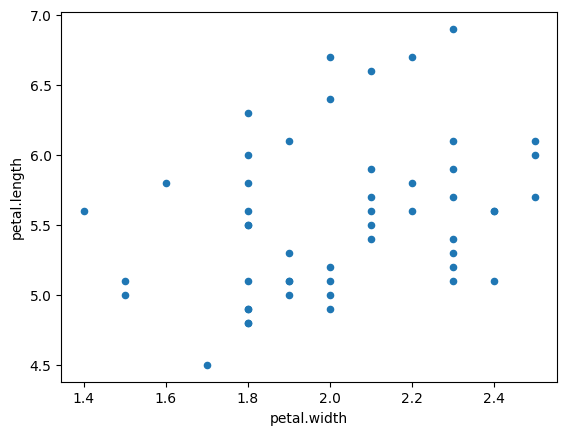

In [185]:
df[df['variety'] == 'Virginica'].plot(kind='scatter', x = 'petal.width', y='petal.length')

In [180]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=304,
)

X_train.shape, y_train.shape

((40, 2), (40,))

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix


model = Pipeline(
    [
        # ('preRobust', RobustScaler()),
        # ('poly', PolynomialFeatures(
        #     degree = 1,
        #     interaction_only=True,
        #     include_bias=False,
        # )),
        # ('Linear', LinearRegression()),
        ('knn', KNeighborsRegressor(n_neighbors=5))
    ]
)

model.fit(X_train, y_train)

Pipeline(steps=[('knn', KNeighborsRegressor())])

In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"R2 score : {r2_score(y_test, model.predict(X_test)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, model.predict(X_test)):.4f}")
print(f"RMSE : {mean_squared_error(y_test, model.predict(X_test), squared=True):.4f}")

R2 score : 0.8225
MAE : 0.1180
RMSE : 0.0224


c:\Users\Administrator\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [184]:
model.predict([[  7.6    ,      2.1]])


c:\Users\Administrator\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([6.6])